# Time series cross validation

In [102]:
import pandas as pd
import datetime
from datetime import datetime as dt
from dateutil.relativedelta import *

class TimeBasedCV(object):
    '''
    Parameters 
    ----------
    train_period: int
        number of time units to include in each train set
        default is 30
    test_period: int
        number of time units to include in each test set
        default is 7
    freq: string
        frequency of input parameters. possible values are: days, months, years, weeks, hours, minutes, seconds
        possible values designed to be used by dateutil.relativedelta class
        deafault is days
    '''
    
    
    def __init__(self, train_period=30, test_period=7, freq='days'):
        self.train_period = train_period
        self.test_period = test_period
        self.freq = freq

        
        
    def split(self, data, validation_split_date=None, date_column='record_date', gap=0):
        '''
        Generate indices to split data into training and test set
        
        Parameters 
        ----------
        data: pandas DataFrame
            your data, contain one column for the record date 
        validation_split_date: datetime.date()
            first date to perform the splitting on.
            if not provided will set to be the minimum date in the data after the first training set
        date_column: string, deafult='record_date'
            date of each record
        gap: int, default=0
            for cases the test set does not come right after the train set,
            *gap* days are left between train and test sets
        
        Returns 
        -------
        train_index ,test_index: 
            list of tuples (train index, test index) similar to sklearn model selection
        '''
        
        # check that date_column exist in the data:
        try:
            data[date_column]
        except:
            raise KeyError(date_column)
                    
        train_indices_list = []
        test_indices_list = []

        if validation_split_date==None:
            validation_split_date = data[date_column].min().date() + eval('relativedelta('+self.freq+'=self.train_period)')
        
        start_train = validation_split_date - eval('relativedelta('+self.freq+'=self.train_period)')
        end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
        start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
        end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        while end_test < data[date_column].max().date():
            # train indices:
            cur_train_indices = list(data[(data[date_column].dt.date>=start_train) & 
                                     (data[date_column].dt.date<end_train)].index)

            # test indices:
            cur_test_indices = list(data[(data[date_column].dt.date>=start_test) &
                                    (data[date_column].dt.date<end_test)].index)
            
            #print("Train period:",start_train,"-" , end_train, ", Test period", start_test, "-", end_test,
            #      "# train records", len(cur_train_indices), ", # test records", len(cur_test_indices))

            train_indices_list.append(cur_train_indices)
            test_indices_list.append(cur_test_indices)

            # update dates:
            start_train = start_train + eval('relativedelta('+self.freq+'=self.test_period)')
            end_train = start_train + eval('relativedelta('+self.freq+'=self.train_period)')
            start_test = end_train + eval('relativedelta('+self.freq+'=gap)')
            end_test = start_test + eval('relativedelta('+self.freq+'=self.test_period)')

        # mimic sklearn output  
        index_output = [(train,test) for train,test in zip(train_indices_list,test_indices_list)]

        self.n_splits = len(index_output)
        
        return index_output
    
    
    def get_n_splits(self):
        """Returns the number of splitting iterations in the cross-validator
        Returns
        -------
        n_splits : int
            Returns the number of splitting iterations in the cross-validator.
        """
        return self.n_splits

# Load Time series

In [125]:
import pandas as pd

# How to use TimeBasedCV
data_for_modeling=pd.read_excel('Data Analysis Credit Spread.xlsx', 'Serie limpia', parse_dates=['Fecha'])
#print(data_for_modeling.head())

#%matplotlib inline
#data_for_modeling['Credit Spread'].plot(figsize=(10, 6))


# ARIMA validation and model selection

ADF Statistic: -1.084890
p-value: 0.721060


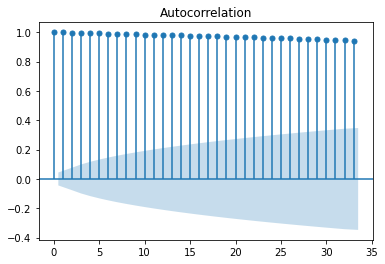

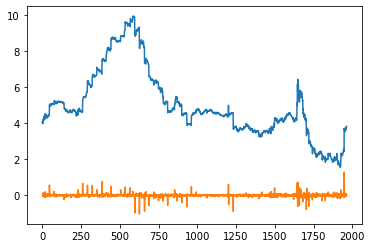

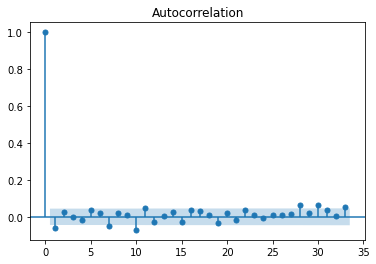

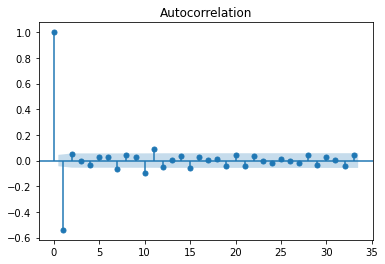

ADF Statistic: -13.480382
p-value: 0.000000
PACF


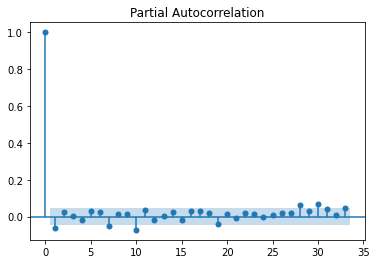

ACF


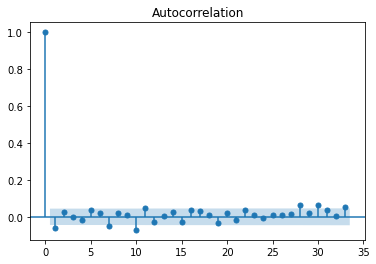

[[6.2934]]
Split-->1
The Mean Squared Error of forecasts in Model 1  is 0.00174523
The Mean Squared Error of forecasts in Model 2  is 0.00119958
[[6.304600000000001]]
Split-->2
The Mean Squared Error of forecasts in Model 1  is 0.0001851
The Mean Squared Error of forecasts in Model 2  is 0.00094324
[[6.2986]]
Split-->3
The Mean Squared Error of forecasts in Model 1  is 4.753e-05
The Mean Squared Error of forecasts in Model 2  is 1.215e-05
[[6.328799999999999]]
Split-->4
The Mean Squared Error of forecasts in Model 1  is 0.00093844
The Mean Squared Error of forecasts in Model 2  is 0.00220446
[[6.4048]]
Split-->5
The Mean Squared Error of forecasts in Model 1  is 0.00551736
The Mean Squared Error of forecasts in Model 2  is 0.0072399
[[6.4137]]
Split-->6
The Mean Squared Error of forecasts in Model 1  is 2.38e-05
The Mean Squared Error of forecasts in Model 2  is 0.0003627
[[6.268299999999999]]
Split-->7
The Mean Squared Error of forecasts in Model 1  is 0.02115614
The Mean Squared Erro

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->16
The Mean Squared Error of forecasts in Model 1  is 0.0003134
The Mean Squared Error of forecasts in Model 2  is 0.00084221
[[6.340999999999999]]
Split-->17
The Mean Squared Error of forecasts in Model 1  is 7.08e-06
The Mean Squared Error of forecasts in Model 2  is 0.00017461
[[6.280099999999999]]
Split-->18
The Mean Squared Error of forecasts in Model 1  is 0.00372027
The Mean Squared Error of forecasts in Model 2  is 0.00256047
[[6.282400000000001]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->19
The Mean Squared Error of forecasts in Model 1  is 3.114e-05
The Mean Squared Error of forecasts in Model 2  is 0.00026897
[[6.274399999999999]]
Split-->20
The Mean Squared Error of forecasts in Model 1  is 7.261e-05
The Mean Squared Error of forecasts in Model 2  is 2.177e-05
[[6.262699999999999]]
Split-->21
The Mean Squared Error of forecasts in Model 1  is 0.0001259
The Mean Squared Error of forecasts in Model 2  is 1.75e-06
[[6.2485]]
Split-->22
The Mean Squared Error of forecasts in Model 1  is 0.00018534
The Mean Squared Error of forecasts in Model 2  is 1.89e-06
[[5.9403]]
Split-->23
The Mean Squared Error of forecasts in Model 1  is 0.09455028
The Mean Squared Error of forecasts in Model 2  is 0.08832348
[[5.9286]]
Split-->24
The Mean Squared Error of forecasts in Model 1  is 2.827e-05
The Mean Squared Error of forecasts in Model 2  is 0.00032524
[[5.8932]]
Split-->25
The Mean Squared Error of forecasts in Model 1  is 0.00133297
The Mean Squared Error of forecasts in

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->27
The Mean Squared Error of forecasts in Model 1  is 0.00011177
The Mean Squared Error of forecasts in Model 2  is 0.00092516


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[[5.949]]
Split-->28
The Mean Squared Error of forecasts in Model 1  is 0.00024292
The Mean Squared Error of forecasts in Model 2  is 0.00058279
[[5.9495]]
Split-->29
The Mean Squared Error of forecasts in Model 1  is 1.2e-07
The Mean Squared Error of forecasts in Model 2  is 0.00031775
[[5.9559999999999995]]
Split-->30
The Mean Squared Error of forecasts in Model 1  is 4.29e-05
The Mean Squared Error of forecasts in Model 2  is 0.00024196
[[5.9542]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->31
The Mean Squared Error of forecasts in Model 1  is 4.68e-06
The Mean Squared Error of forecasts in Model 2  is 0.00022373
[[5.9914]]
Split-->32
The Mean Squared Error of forecasts in Model 1  is 0.0013937
The Mean Squared Error of forecasts in Model 2  is 0.00217716
[[6.0053]]
Split-->33
The Mean Squared Error of forecasts in Model 1  is 0.00014014
The Mean Squared Error of forecasts in Model 2  is 0.00074006


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[[5.9325]]
Split-->34
The Mean Squared Error of forecasts in Model 1  is 0.00538429
The Mean Squared Error of forecasts in Model 2  is 0.00421565
[[5.861100000000001]]
Split-->35
The Mean Squared Error of forecasts in Model 1  is 0.00453155
The Mean Squared Error of forecasts in Model 2  is 0.00272997
[[5.7017000000000015]]
Split-->36
The Mean Squared Error of forecasts in Model 1  is 0.02427024
The Mean Squared Error of forecasts in Model 2  is 0.02063679
[[5.7113]]
Split-->37
The Mean Squared Error of forecasts in Model 1  is 0.00033934
The Mean Squared Error of forecasts in Model 2  is 0.0011944
[[5.7104]]
Split-->38
The Mean Squared Error of forecasts in Model 1  is 4.9e-06
The Mean Squared Error of forecasts in Model 2  is 0.00022023
[[5.7959]]
Split-->39
The Mean Squared Error of forecasts in Model 1  is 0.00733873
The Mean Squared Error of forecasts in Model 2  is 0.00973591
[[5.787399999999999]]
Split-->40
The Mean Squared Error of forecasts in Model 1  is 0.00017783
The Mean S

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->47
The Mean Squared Error of forecasts in Model 1  is 0.00014158
The Mean Squared Error of forecasts in Model 2  is 8.52e-06
[[5.816]]
Split-->48
The Mean Squared Error of forecasts in Model 1  is 0.01904542
The Mean Squared Error of forecasts in Model 2  is 0.01619801
[[5.7810999999999995]]
Split-->49
The Mean Squared Error of forecasts in Model 1  is 0.00070356
The Mean Squared Error of forecasts in Model 2  is 0.00025144
[[5.756]]
Split-->50
The Mean Squared Error of forecasts in Model 1  is 0.0005612
The Mean Squared Error of forecasts in Model 2  is 5.87e-05
[[5.4376]]
Split-->51
The Mean Squared Error of forecasts in Model 1  is 0.10042353
The Mean Squared Error of forecasts in Model 2  is 0.09411086
[[5.458400000000001]]
Split-->52
The Mean Squared Error of forecasts in Model 1  is 0.00174005
The Mean Squared Error of forecasts in Model 2  is 0.00316639
[[5.3241]]
Split-->53
The Mean Squared Error of forecasts in Model 1  is 0.01889108
The Mean Squared Error of forecasts

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->62
The Mean Squared Error of forecasts in Model 1  is 0.0005437
The Mean Squared Error of forecasts in Model 2  is 4.161e-05
[[5.0363999999999995]]
Split-->63
The Mean Squared Error of forecasts in Model 1  is 7.533e-05
The Mean Squared Error of forecasts in Model 2  is 0.00078784
[[5.076600000000001]]
Split-->64
The Mean Squared Error of forecasts in Model 1  is 0.00156886
The Mean Squared Error of forecasts in Model 2  is 0.00318605


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[[5.076600000000001]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->65
The Mean Squared Error of forecasts in Model 1  is 7.22e-06
The Mean Squared Error of forecasts in Model 2  is 0.00023671
[[5.0707]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->66
The Mean Squared Error of forecasts in Model 1  is 3.264e-05
The Mean Squared Error of forecasts in Model 2  is 8.772e-05
[[5.0745]]
Split-->67
The Mean Squared Error of forecasts in Model 1  is 1.753e-05
The Mean Squared Error of forecasts in Model 2  is 0.00048326
[[5.126199999999999]]
Split-->68
The Mean Squared Error of forecasts in Model 1  is 0.00264352
The Mean Squared Error of forecasts in Model 2  is 0.00445962
[[5.1333]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->69
The Mean Squared Error of forecasts in Model 1  is 1.305e-05
The Mean Squared Error of forecasts in Model 2  is 0.00042661
[[5.2101]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->70
The Mean Squared Error of forecasts in Model 1  is 0.00586151
The Mean Squared Error of forecasts in Model 2  is 0.00809724
[[5.2307999999999995]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->71
The Mean Squared Error of forecasts in Model 1  is 0.00024029
The Mean Squared Error of forecasts in Model 2  is 0.00103698
[[5.199]]
Split-->72
The Mean Squared Error of forecasts in Model 1  is 0.00107999
The Mean Squared Error of forecasts in Model 2  is 0.00048471
[[5.188999999999999]]
Split-->73
The Mean Squared Error of forecasts in Model 1  is 6.032e-05
The Mean Squared Error of forecasts in Model 2  is 6.581e-05
[[5.159599999999999]]
Split-->74
The Mean Squared Error of forecasts in Model 1  is 0.00083356
The Mean Squared Error of forecasts in Model 2  is 0.00025513
[[5.155000000000001]]
Split-->75
The Mean Squared Error of forecasts in Model 1  is 6.94e-06
The Mean Squared Error of forecasts in Model 2  is 0.00016006
[[5.169199999999999]]
Split-->76
The Mean Squared Error of forecasts in Model 1  is 0.0002068
The Mean Squared Error of forecasts in Model 2  is 0.00078548
[[5.211499999999999]]
Split-->77
The Mean Squared Error of forecasts in Model 1  is 0.00170808
Th

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->92
The Mean Squared Error of forecasts in Model 1  is 2e-08
The Mean Squared Error of forecasts in Model 2  is 0.00056381
[[4.6316999999999995]]
Split-->93
The Mean Squared Error of forecasts in Model 1  is 6.88e-05
The Mean Squared Error of forecasts in Model 2  is 3.31e-06
[[4.631600000000001]]
Split-->94
The Mean Squared Error of forecasts in Model 1  is 2.1e-07
The Mean Squared Error of forecasts in Model 2  is 0.00049691
[[4.6469]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->95
The Mean Squared Error of forecasts in Model 1  is 0.00023361
The Mean Squared Error of forecasts in Model 2  is 0.00071242
[[4.677299999999999]]
Split-->96
The Mean Squared Error of forecasts in Model 1  is 0.000863
The Mean Squared Error of forecasts in Model 2  is 0.00233718
[[4.659599999999999]]
Split-->97
The Mean Squared Error of forecasts in Model 1  is 0.00038717
The Mean Squared Error of forecasts in Model 2  is 5.344e-05
[[4.701899999999999]]
Split-->98
The Mean Squared Error of forecasts in Model 1  is 0.00190257
The Mean Squared Error of forecasts in Model 2  is 0.00378114
[[4.649099999999999]]
Split-->99
The Mean Squared Error of forecasts in Model 1  is 0.00310509
The Mean Squared Error of forecasts in Model 2  is 0.00181136
[[4.6569]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->100
The Mean Squared Error of forecasts in Model 1  is 0.00013237
The Mean Squared Error of forecasts in Model 2  is 0.00071259
[[4.655300000000001]]
Split-->101
The Mean Squared Error of forecasts in Model 1  is 5.53e-06
The Mean Squared Error of forecasts in Model 2  is 0.00017502
[[4.615900000000001]]
Split-->102
The Mean Squared Error of forecasts in Model 1  is 0.00154024
The Mean Squared Error of forecasts in Model 2  is 0.00062833
[[4.6088]]
Split-->103
The Mean Squared Error of forecasts in Model 1  is 2.012e-05
The Mean Squared Error of forecasts in Model 2  is 0.000122
[[4.661200000000001]]
Split-->104
The Mean Squared Error of forecasts in Model 1  is 0.00277792
The Mean Squared Error of forecasts in Model 2  is 0.00464594
[[4.7139]]
Split-->105
The Mean Squared Error of forecasts in Model 1  is 0.00241976
The Mean Squared Error of forecasts in Model 2  is 0.00411329
[[4.6949000000000005]]
Split-->106
The Mean Squared Error of forecasts in Model 1  is 0.00049717
The 

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->107
The Mean Squared Error of forecasts in Model 1  is 2.18e-06
The Mean Squared Error of forecasts in Model 2  is 0.00020477
[[4.681399999999999]]
Split-->108
The Mean Squared Error of forecasts in Model 1  is 0.00018488
The Mean Squared Error of forecasts in Model 2  is 1.5e-07
[[4.6741]]
Split-->109
The Mean Squared Error of forecasts in Model 1  is 4.086e-05
The Mean Squared Error of forecasts in Model 2  is 4.088e-05
[[4.7444999999999995]]
Split-->110
The Mean Squared Error of forecasts in Model 1  is 0.00501654
The Mean Squared Error of forecasts in Model 2  is 0.00723153
[[4.7741999999999996]]
Split-->111
The Mean Squared Error of forecasts in Model 1  is 0.00062333
The Mean Squared Error of forecasts in Model 2  is 0.00142998
[[4.8139]]
Split-->112
The Mean Squared Error of forecasts in Model 1  is 0.00144614
The Mean Squared Error of forecasts in Model 2  is 0.00242357
[[4.8229999999999995]]
Split-->113
The Mean Squared Error of forecasts in Model 1  is 4.286e-05
The M

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[[4.788699999999999]]
Split-->115
The Mean Squared Error of forecasts in Model 1  is 2.7e-07
The Mean Squared Error of forecasts in Model 2  is 0.00015736
[[4.815499999999999]]
Split-->116
The Mean Squared Error of forecasts in Model 1  is 0.0007166
The Mean Squared Error of forecasts in Model 2  is 0.00148288
[[4.843299999999999]]
Split-->117
The Mean Squared Error of forecasts in Model 1  is 0.00067609
The Mean Squared Error of forecasts in Model 2  is 0.00140574
[[4.7779]]
Split-->118
The Mean Squared Error of forecasts in Model 1  is 0.00450948
The Mean Squared Error of forecasts in Model 2  is 0.00322858
[[4.812]]
Split-->119
The Mean Squared Error of forecasts in Model 1  is 0.00149015
The Mean Squared Error of forecasts in Model 2  is 0.0024003
[[4.873600000000001]]
Split-->120
The Mean Squared Error of forecasts in Model 1  is 0.00348446
The Mean Squared Error of forecasts in Model 2  is 0.00519543
[[4.873399999999999]]
Split-->121
The Mean Squared Error of forecasts in Model 1

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->122
The Mean Squared Error of forecasts in Model 1  is 0.00011635
The Mean Squared Error of forecasts in Model 2  is 0.00044635
[[4.882600000000001]]
Split-->123
The Mean Squared Error of forecasts in Model 1  is 4.1e-06
The Mean Squared Error of forecasts in Model 2  is 5.81e-05
[[4.739700000000001]]
Split-->124
The Mean Squared Error of forecasts in Model 1  is 0.02038121
The Mean Squared Error of forecasts in Model 2  is 0.01764517
[[4.7499]]
Split-->125
The Mean Squared Error of forecasts in Model 1  is 0.00039106
The Mean Squared Error of forecasts in Model 2  is 0.00086001
[[4.766500000000001]]
Split-->126
The Mean Squared Error of forecasts in Model 1  is 0.0002326
The Mean Squared Error of forecasts in Model 2  is 0.000914
[[5.066800000000001]]
Split-->127
The Mean Squared Error of forecasts in Model 1  is 0.08956073
The Mean Squared Error of forecasts in Model 2  is 0.09426721
[[5.0680000000000005]]
Split-->128
The Mean Squared Error of forecasts in Model 1  is 0.00035

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->145
The Mean Squared Error of forecasts in Model 1  is 6e-08
The Mean Squared Error of forecasts in Model 2  is 0.00015604
[[5.1936]]
Split-->146
The Mean Squared Error of forecasts in Model 1  is 0.00016861
The Mean Squared Error of forecasts in Model 2  is 0.00020698
[[5.1941]]
Split-->147
The Mean Squared Error of forecasts in Model 1  is 1.3e-07
The Mean Squared Error of forecasts in Model 2  is 0.00010192
[[5.174799999999999]]
Split-->148
The Mean Squared Error of forecasts in Model 1  is 0.00037157
The Mean Squared Error of forecasts in Model 2  is 0.0002954
[[5.182699999999999]]
Split-->149
The Mean Squared Error of forecasts in Model 1  is 8.42e-05
The Mean Squared Error of forecasts in Model 2  is 0.0003379
[[5.1972]]
Split-->150
The Mean Squared Error of forecasts in Model 1  is 0.000193
The Mean Squared Error of forecasts in Model 2  is 0.00030513
[[5.181599999999999]]
Split-->151
The Mean Squared Error of forecasts in Model 1  is 0.00027341
The Mean Squared Error of

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->161
The Mean Squared Error of forecasts in Model 1  is 0.01041806
The Mean Squared Error of forecasts in Model 2  is 0.01230215
[[5.023899999999999]]
Split-->162
The Mean Squared Error of forecasts in Model 1  is 2.246e-05
The Mean Squared Error of forecasts in Model 2  is 1.269e-05
[[5.023899999999999]]
Split-->163
The Mean Squared Error of forecasts in Model 1  is 1.4e-07
The Mean Squared Error of forecasts in Model 2  is 1.496e-05
[[5.022200000000001]]
Split-->164
The Mean Squared Error of forecasts in Model 1  is 2.99e-06
The Mean Squared Error of forecasts in Model 2  is 4.76e-05
[[5.0352]]
Split-->165
The Mean Squared Error of forecasts in Model 1  is 0.00017199
The Mean Squared Error of forecasts in Model 2  is 0.00031496
[[5.0854]]
Split-->166
The Mean Squared Error of forecasts in Model 1  is 0.00243369
The Mean Squared Error of forecasts in Model 2  is 0.00326838
[[5.060300000000001]]
Split-->167
The Mean Squared Error of forecasts in Model 1  is 0.00080387
The Mean S

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[[4.9902]]
Split-->171
The Mean Squared Error of forecasts in Model 1  is 0.00016636
The Mean Squared Error of forecasts in Model 2  is 0.00033672
[[5.0263]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->172
The Mean Squared Error of forecasts in Model 1  is 0.00124216
The Mean Squared Error of forecasts in Model 2  is 0.00181316
[[4.607200000000001]]
Split-->173
The Mean Squared Error of forecasts in Model 1  is 0.17760604
The Mean Squared Error of forecasts in Model 2  is 0.17321507
[[4.5241999999999996]]
Split-->174
The Mean Squared Error of forecasts in Model 1  is 0.00310409
The Mean Squared Error of forecasts in Model 2  is 0.00257603
[[4.4281]]
Split-->175
The Mean Squared Error of forecasts in Model 1  is 0.00862556
The Mean Squared Error of forecasts in Model 2  is 0.0052914
[[4.4681]]
Split-->176
The Mean Squared Error of forecasts in Model 1  is 0.00214593
The Mean Squared Error of forecasts in Model 2  is 0.00256722
[[4.4666]]
Split-->177
The Mean Squared Error of forecasts in Model 1  is 2.096e-05
The Mean Squared Error of forecasts in Model 2  is 0.00018432
[[4.4830000000000005]]
Split-->178
The Mean Squared Error of forecasts in Model 1  is 0.00027832
The Mean Sq

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->181
The Mean Squared Error of forecasts in Model 1  is 0.00158118
The Mean Squared Error of forecasts in Model 2  is 0.00070121
[[4.4526]]
Split-->182
The Mean Squared Error of forecasts in Model 1  is 0.00094972
The Mean Squared Error of forecasts in Model 2  is 0.00145126
[[4.4859]]
Split-->183
The Mean Squared Error of forecasts in Model 1  is 0.00097615
The Mean Squared Error of forecasts in Model 2  is 0.00199488
[[4.4955]]
Split-->184
The Mean Squared Error of forecasts in Model 1  is 5.584e-05
The Mean Squared Error of forecasts in Model 2  is 0.00020107
[[4.4912]]
Split-->185
The Mean Squared Error of forecasts in Model 1  is 2.38e-05
The Mean Squared Error of forecasts in Model 2  is 4.405e-05
[[4.5318000000000005]]
Split-->186
The Mean Squared Error of forecasts in Model 1  is 0.00167359
The Mean Squared Error of forecasts in Model 2  is 0.00234112
[[4.556100000000001]]
Split-->187
The Mean Squared Error of forecasts in Model 1  is 0.00046363
The Mean Squared Error of

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->232
The Mean Squared Error of forecasts in Model 1  is 0.00107921
The Mean Squared Error of forecasts in Model 2  is 0.00043985
[[3.904300000000001]]
Split-->233
The Mean Squared Error of forecasts in Model 1  is 1.713e-05
The Mean Squared Error of forecasts in Model 2  is 1.139e-05
[[3.9037]]
Split-->234
The Mean Squared Error of forecasts in Model 1  is 3e-08
The Mean Squared Error of forecasts in Model 2  is 0.0001455
[[4.385899999999999]]
Split-->235
The Mean Squared Error of forecasts in Model 1  is 0.23254596
The Mean Squared Error of forecasts in Model 2  is 0.2400409
[[4.4056999999999995]]
Split-->236
The Mean Squared Error of forecasts in Model 1  is 0.00015645
The Mean Squared Error of forecasts in Model 2  is 3e-08
[[4.4179]]
Split-->237
The Mean Squared Error of forecasts in Model 1  is 0.00012951
The Mean Squared Error of forecasts in Model 2  is 2.268e-05
[[4.460299999999999]]
Split-->238
The Mean Squared Error of forecasts in Model 1  is 0.00173079
The Mean Squar

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->239
The Mean Squared Error of forecasts in Model 1  is 0.00053522
The Mean Squared Error of forecasts in Model 2  is 0.00038112
[[4.494000000000001]]
Split-->240
The Mean Squared Error of forecasts in Model 1  is 3.803e-05
The Mean Squared Error of forecasts in Model 2  is 0.00033498
[[4.4883999999999995]]
Split-->241
The Mean Squared Error of forecasts in Model 1  is 3.691e-05
The Mean Squared Error of forecasts in Model 2  is 5.689e-05
[[4.4604]]
Split-->242
The Mean Squared Error of forecasts in Model 1  is 0.00076304
The Mean Squared Error of forecasts in Model 2  is 0.00029379
[[4.444400000000001]]
Split-->243
The Mean Squared Error of forecasts in Model 1  is 0.00020032
The Mean Squared Error of forecasts in Model 2  is 0.00018639
[[4.4763]]
Split-->244
The Mean Squared Error of forecasts in Model 1  is 0.00108278
The Mean Squared Error of forecasts in Model 2  is 0.001849
[[4.5195]]
Split-->245
The Mean Squared Error of forecasts in Model 1  is 0.00168724
The Mean Square

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->250
The Mean Squared Error of forecasts in Model 1  is 0.00057908
The Mean Squared Error of forecasts in Model 2  is 0.00083584
[[4.5251]]
Split-->251
The Mean Squared Error of forecasts in Model 1  is 3.322e-05
The Mean Squared Error of forecasts in Model 2  is 2.5e-07
[[4.5492]]
Split-->252
The Mean Squared Error of forecasts in Model 1  is 0.00059631
The Mean Squared Error of forecasts in Model 2  is 0.0007594
[[4.5548]]
Split-->253
The Mean Squared Error of forecasts in Model 1  is 1.607e-05
The Mean Squared Error of forecasts in Model 2  is 7.092e-05
[[4.562200000000001]]
Split-->254
The Mean Squared Error of forecasts in Model 1  is 5.021e-05
The Mean Squared Error of forecasts in Model 2  is 7.88e-05
[[4.5676000000000005]]
Split-->255
The Mean Squared Error of forecasts in Model 1  is 2.425e-05
The Mean Squared Error of forecasts in Model 2  is 8.129e-05
[[4.5966]]
Split-->256
The Mean Squared Error of forecasts in Model 1  is 0.00082117
The Mean Squared Error of forecas

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->262
The Mean Squared Error of forecasts in Model 1  is 3.301e-05
The Mean Squared Error of forecasts in Model 2  is 9.46e-06
[[4.550299999999999]]
Split-->263
The Mean Squared Error of forecasts in Model 1  is 0.00026844
The Mean Squared Error of forecasts in Model 2  is 0.00018801
[[4.5644]]
Split-->264
The Mean Squared Error of forecasts in Model 1  is 0.00023397
The Mean Squared Error of forecasts in Model 2  is 0.00034952
[[4.7536]]
Split-->265
The Mean Squared Error of forecasts in Model 1  is 0.03537099
The Mean Squared Error of forecasts in Model 2  is 0.0368022
[[4.7478]]
Split-->266
The Mean Squared Error of forecasts in Model 1  is 0.00038554
The Mean Squared Error of forecasts in Model 2  is 0.00028175
[[4.7116999999999996]]
Split-->267
The Mean Squared Error of forecasts in Model 1  is 0.00118071
The Mean Squared Error of forecasts in Model 2  is 0.00141076
[[4.7006000000000006]]
Split-->268
The Mean Squared Error of forecasts in Model 1  is 7.456e-05
The Mean Squar

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[[4.633299999999999]]
Split-->291
The Mean Squared Error of forecasts in Model 1  is 7.38e-06
The Mean Squared Error of forecasts in Model 2  is 1.31e-05
[[4.663]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->292
The Mean Squared Error of forecasts in Model 1  is 0.00087029
The Mean Squared Error of forecasts in Model 2  is 0.00108232
[[4.643400000000001]]
Split-->293
The Mean Squared Error of forecasts in Model 1  is 0.00047274
The Mean Squared Error of forecasts in Model 2  is 0.00043101
[[4.554900000000001]]
Split-->294
The Mean Squared Error of forecasts in Model 1  is 0.00754406
The Mean Squared Error of forecasts in Model 2  is 0.00722193
[[4.5125]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->295
The Mean Squared Error of forecasts in Model 1  is 0.00129014
The Mean Squared Error of forecasts in Model 2  is 0.00111245
[[4.5125]]
Split-->296
The Mean Squared Error of forecasts in Model 1  is 6.16e-06
The Mean Squared Error of forecasts in Model 2  is 6.549e-05
[[4.503299999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->297
The Mean Squared Error of forecasts in Model 1  is 8.995e-05
The Mean Squared Error of forecasts in Model 2  is 4.464e-05
[[4.4793]]
Split-->298
The Mean Squared Error of forecasts in Model 1  is 0.00054134
The Mean Squared Error of forecasts in Model 2  is 0.00036751
[[4.513799999999999]]
Split-->299
The Mean Squared Error of forecasts in Model 1  is 0.00131364
The Mean Squared Error of forecasts in Model 2  is 0.00153492
[[4.5289]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->300
The Mean Squared Error of forecasts in Model 1  is 0.00015066
The Mean Squared Error of forecasts in Model 2  is 0.00028672
[[4.5216]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->301
The Mean Squared Error of forecasts in Model 1  is 6.61e-05
The Mean Squared Error of forecasts in Model 2  is 4.538e-05
[[4.5334]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->302
The Mean Squared Error of forecasts in Model 1  is 0.00015489
The Mean Squared Error of forecasts in Model 2  is 0.00027257
[[4.5334]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->303
The Mean Squared Error of forecasts in Model 1  is 9.3e-07
The Mean Squared Error of forecasts in Model 2  is 1.58e-06
[[4.5512]]
Split-->304
The Mean Squared Error of forecasts in Model 1  is 0.00032078
The Mean Squared Error of forecasts in Model 2  is 0.0004498
[[4.544099999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->305
The Mean Squared Error of forecasts in Model 1  is 7.155e-05
The Mean Squared Error of forecasts in Model 2  is 3.737e-05
[[4.5258]]
Split-->306
The Mean Squared Error of forecasts in Model 1  is 0.00031006
The Mean Squared Error of forecasts in Model 2  is 0.00023167
[[4.5061]]
Split-->307
The Mean Squared Error of forecasts in Model 1  is 0.00033831
The Mean Squared Error of forecasts in Model 2  is 0.00024352
[[4.526600000000001]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->308
The Mean Squared Error of forecasts in Model 1  is 0.00047727
The Mean Squared Error of forecasts in Model 2  is 0.00063304


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[[4.5759]]
Split-->309
The Mean Squared Error of forecasts in Model 1  is 0.00226532
The Mean Squared Error of forecasts in Model 2  is 0.00257091
[[4.5882]]
Split-->310
The Mean Squared Error of forecasts in Model 1  is 7.657e-05
The Mean Squared Error of forecasts in Model 2  is 0.00011285
[[4.571]]
Split-->311
The Mean Squared Error of forecasts in Model 1  is 0.00031445
The Mean Squared Error of forecasts in Model 2  is 0.00026972
[[4.581500000000001]]
Split-->312
The Mean Squared Error of forecasts in Model 1  is 0.00014083
The Mean Squared Error of forecasts in Model 2  is 0.00019948
[[4.6082]]
Split-->313
The Mean Squared Error of forecasts in Model 1  is 0.00066287
The Mean Squared Error of forecasts in Model 2  is 0.00079618
[[4.6128]]
Split-->314
The Mean Squared Error of forecasts in Model 1  is 7.17e-06
The Mean Squared Error of forecasts in Model 2  is 1.902e-05
[[4.619000000000001]]
Split-->315
The Mean Squared Error of forecasts in Model 1  is 3.687e-05
The Mean Squared 

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->328
The Mean Squared Error of forecasts in Model 1  is 0.00164326
The Mean Squared Error of forecasts in Model 2  is 0.00179681
[[4.738899999999999]]
Split-->329
The Mean Squared Error of forecasts in Model 1  is 0.00025354
The Mean Squared Error of forecasts in Model 2  is 0.00023447
[[4.738899999999999]]
Split-->330
The Mean Squared Error of forecasts in Model 1  is 1.98e-06
The Mean Squared Error of forecasts in Model 2  is 1.77e-06
[[4.752]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->331
The Mean Squared Error of forecasts in Model 1  is 0.00016706
The Mean Squared Error of forecasts in Model 2  is 0.00020662
[[4.7809]]
Split-->332
The Mean Squared Error of forecasts in Model 1  is 0.00077751
The Mean Squared Error of forecasts in Model 2  is 0.00079661
[[4.7108]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->333
The Mean Squared Error of forecasts in Model 1  is 0.00522291
The Mean Squared Error of forecasts in Model 2  is 0.0051251
[[4.5607999999999995]]
Split-->334
The Mean Squared Error of forecasts in Model 1  is 0.02079271
The Mean Squared Error of forecasts in Model 2  is 0.02096953
[[4.5709]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->335
The Mean Squared Error of forecasts in Model 1  is 0.00045776
The Mean Squared Error of forecasts in Model 2  is 0.00061935
[[4.6252]]
Split-->336
The Mean Squared Error of forecasts in Model 1  is 0.0027097
The Mean Squared Error of forecasts in Model 2  is 0.00319674
[[4.6577]]
Split-->337
The Mean Squared Error of forecasts in Model 1  is 0.00080881
The Mean Squared Error of forecasts in Model 2  is 0.00083744
[[4.6395]]
Split-->338
The Mean Squared Error of forecasts in Model 1  is 0.00041119
The Mean Squared Error of forecasts in Model 2  is 0.00036411
[[4.643200000000001]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->339
The Mean Squared Error of forecasts in Model 1  is 2.945e-05
The Mean Squared Error of forecasts in Model 2  is 3.453e-05
[[4.685700000000001]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->340
The Mean Squared Error of forecasts in Model 1  is 0.00176223
The Mean Squared Error of forecasts in Model 2  is 0.00197306
[[4.6998999999999995]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->341
The Mean Squared Error of forecasts in Model 1  is 0.00011795
The Mean Squared Error of forecasts in Model 2  is 0.0001282
[[4.6663000000000014]]
Split-->342
The Mean Squared Error of forecasts in Model 1  is 0.00117694
The Mean Squared Error of forecasts in Model 2  is 0.00113631
[[4.689000000000001]]
Split-->343
The Mean Squared Error of forecasts in Model 1  is 0.00064986
The Mean Squared Error of forecasts in Model 2  is 0.0006752
[[4.6888000000000005]]
Split-->344
The Mean Squared Error of forecasts in Model 1  is 5.65e-06
The Mean Squared Error of forecasts in Model 2  is 1e-08
[[4.6888000000000005]]
Split-->345
The Mean Squared Error of forecasts in Model 1  is 9e-08
The Mean Squared Error of forecasts in Model 2  is 3e-08
[[4.6777999999999995]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->346
The Mean Squared Error of forecasts in Model 1  is 0.00012187
The Mean Squared Error of forecasts in Model 2  is 8.435e-05
[[4.6823]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->347
The Mean Squared Error of forecasts in Model 1  is 2.899e-05
The Mean Squared Error of forecasts in Model 2  is 2.719e-05
[[4.703899999999999]]
Split-->348
The Mean Squared Error of forecasts in Model 1  is 0.00044627
The Mean Squared Error of forecasts in Model 2  is 0.00053855
[[4.711899999999999]]
Split-->349
The Mean Squared Error of forecasts in Model 1  is 4.018e-05
The Mean Squared Error of forecasts in Model 2  is 4.154e-05
[[4.706999999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->350
The Mean Squared Error of forecasts in Model 1  is 2.833e-05
The Mean Squared Error of forecasts in Model 2  is 1.89e-05
[[4.706999999999999]]
Split-->351
The Mean Squared Error of forecasts in Model 1  is 2e-07
The Mean Squared Error of forecasts in Model 2  is 5.8e-07
[[4.706999999999999]]
Split-->352
The Mean Squared Error of forecasts in Model 1  is 0.0
The Mean Squared Error of forecasts in Model 2  is 1.53e-06
[[4.6997]]
Split-->353
The Mean Squared Error of forecasts in Model 1  is 5.318e-05
The Mean Squared Error of forecasts in Model 2  is 5.369e-05
[[4.681399999999999]]
Split-->354
The Mean Squared Error of forecasts in Model 1  is 0.00031391
The Mean Squared Error of forecasts in Model 2  is 0.00027587
[[4.7293]]
Split-->355
The Mean Squared Error of forecasts in Model 1  is 0.0024271
The Mean Squared Error of forecasts in Model 2  is 0.00246388
[[4.7511]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->356
The Mean Squared Error of forecasts in Model 1  is 0.00032399
The Mean Squared Error of forecasts in Model 2  is 0.0003946
[[4.766699999999999]]
Split-->357
The Mean Squared Error of forecasts in Model 1  is 0.00020744
The Mean Squared Error of forecasts in Model 2  is 0.00018095
[[4.7581]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->358
The Mean Squared Error of forecasts in Model 1  is 9.298e-05
The Mean Squared Error of forecasts in Model 2  is 7.404e-05
[[4.7581]]
Split-->359
The Mean Squared Error of forecasts in Model 1  is 6.1e-07
The Mean Squared Error of forecasts in Model 2  is 3e-08
[[4.7296000000000005]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->360
The Mean Squared Error of forecasts in Model 1  is 0.00081775
The Mean Squared Error of forecasts in Model 2  is 0.00074791
[[4.7315]]
Split-->361
The Mean Squared Error of forecasts in Model 1  is 1.667e-05
The Mean Squared Error of forecasts in Model 2  is 1.084e-05
[[4.767199999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->362
The Mean Squared Error of forecasts in Model 1  is 0.00124524
The Mean Squared Error of forecasts in Model 2  is 0.00141717
[[4.7236]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->363
The Mean Squared Error of forecasts in Model 1  is 0.00214075
The Mean Squared Error of forecasts in Model 2  is 0.00223693
[[4.7196]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->364
The Mean Squared Error of forecasts in Model 1  is 1.3e-07
The Mean Squared Error of forecasts in Model 2  is 1e-08
[[4.6638]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->365
The Mean Squared Error of forecasts in Model 1  is 0.00312976
The Mean Squared Error of forecasts in Model 2  is 0.0030298
[[4.6747]]
Split-->366
The Mean Squared Error of forecasts in Model 1  is 0.0002297
The Mean Squared Error of forecasts in Model 2  is 0.00023593
[[4.697900000000001]]
Split-->367
The Mean Squared Error of forecasts in Model 1  is 0.0004777
The Mean Squared Error of forecasts in Model 2  is 0.00059718
[[4.661499999999999]]
Split-->368
The Mean Squared Error of forecasts in Model 1  is 0.00144376
The Mean Squared Error of forecasts in Model 2  is 0.00150059
[[4.6358]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->369
The Mean Squared Error of forecasts in Model 1  is 0.00051731
The Mean Squared Error of forecasts in Model 2  is 0.0004627
[[4.6438]]
Split-->370
The Mean Squared Error of forecasts in Model 1  is 9.18e-05
The Mean Squared Error of forecasts in Model 2  is 0.00012066
[[4.612299999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->371
The Mean Squared Error of forecasts in Model 1  is 0.00104362
The Mean Squared Error of forecasts in Model 2  is 0.00093238
[[4.593099999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->372
The Mean Squared Error of forecasts in Model 1  is 0.00027881
The Mean Squared Error of forecasts in Model 2  is 0.00026775
[[4.587899999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->373
The Mean Squared Error of forecasts in Model 1  is 1.638e-05
The Mean Squared Error of forecasts in Model 2  is 2.18e-06
[[4.5825]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->374
The Mean Squared Error of forecasts in Model 1  is 2.649e-05
The Mean Squared Error of forecasts in Model 2  is 1.771e-05
[[4.5886000000000005]]
Split-->375
The Mean Squared Error of forecasts in Model 1  is 4.199e-05
The Mean Squared Error of forecasts in Model 2  is 7.485e-05
[[4.558199999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->376
The Mean Squared Error of forecasts in Model 1  is 0.00095559
The Mean Squared Error of forecasts in Model 2  is 0.00089409
[[4.584999999999999]]
Split-->377
The Mean Squared Error of forecasts in Model 1  is 0.00085156
The Mean Squared Error of forecasts in Model 2  is 0.0009477
[[4.607999999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->378
The Mean Squared Error of forecasts in Model 1  is 0.00042703
The Mean Squared Error of forecasts in Model 2  is 0.00051935
[[4.5893999999999995]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->379
The Mean Squared Error of forecasts in Model 1  is 0.00040243
The Mean Squared Error of forecasts in Model 2  is 0.00038919
[[4.593299999999998]]
Split-->380
The Mean Squared Error of forecasts in Model 1  is 3.024e-05
The Mean Squared Error of forecasts in Model 2  is 4.86e-05
[[4.593]]
Split-->381
The Mean Squared Error of forecasts in Model 1  is 6.4e-07
The Mean Squared Error of forecasts in Model 2  is 6.9e-07
[[4.5825000000000005]]
Split-->382
The Mean Squared Error of forecasts in Model 1  is 0.00010848
The Mean Squared Error of forecasts in Model 2  is 8.884e-05
[[4.540400000000001]]
Split-->383
The Mean Squared Error of forecasts in Model 1  is 0.00170647
The Mean Squared Error of forecasts in Model 2  is 0.00159091
[[4.584499999999999]]
Split-->384
The Mean Squared Error of forecasts in Model 1  is 0.00222852
The Mean Squared Error of forecasts in Model 2  is 0.00235938
[[4.5992999999999995]]
Split-->385
The Mean Squared Error of forecasts in Model 1  is 0.0001222

C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


[[4.503799999999999]]
Split-->394
The Mean Squared Error of forecasts in Model 1  is 4.725e-05
The Mean Squared Error of forecasts in Model 2  is 1.632e-05
[[4.5132]]
Split-->395
The Mean Squared Error of forecasts in Model 1  is 9.918e-05
The Mean Squared Error of forecasts in Model 2  is 0.00014527
[[4.548000000000001]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->396
The Mean Squared Error of forecasts in Model 1  is 0.00115477
The Mean Squared Error of forecasts in Model 2  is 0.00130697
[[4.5776]]
Split-->397
The Mean Squared Error of forecasts in Model 1  is 0.00071998
The Mean Squared Error of forecasts in Model 2  is 0.00080837
[[4.6017]]
Split-->398
The Mean Squared Error of forecasts in Model 1  is 0.00048101
The Mean Squared Error of forecasts in Model 2  is 0.00053446
[[4.5971]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->399
The Mean Squared Error of forecasts in Model 1  is 4.063e-05
The Mean Squared Error of forecasts in Model 2  is 2.825e-05
[[4.5987]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->400
The Mean Squared Error of forecasts in Model 1  is 4.57e-06
The Mean Squared Error of forecasts in Model 2  is 8.3e-06
[[4.6025]]
Split-->401
The Mean Squared Error of forecasts in Model 1  is 1.31e-05
The Mean Squared Error of forecasts in Model 2  is 2.707e-05
[[4.6091999999999995]]
Split-->402
The Mean Squared Error of forecasts in Model 1  is 4.104e-05
The Mean Squared Error of forecasts in Model 2  is 5.426e-05
[[4.5943]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->403
The Mean Squared Error of forecasts in Model 1  is 0.00023779
The Mean Squared Error of forecasts in Model 2  is 0.00020038
[[4.5947000000000005]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->404
The Mean Squared Error of forecasts in Model 1  is 2.78e-06
The Mean Squared Error of forecasts in Model 2  is 4.84e-06
[[4.5431]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->405
The Mean Squared Error of forecasts in Model 1  is 0.002678
The Mean Squared Error of forecasts in Model 2  is 0.00249118
[[4.5527999999999995]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->406
The Mean Squared Error of forecasts in Model 1  is 0.00019397
The Mean Squared Error of forecasts in Model 2  is 0.000216
[[4.560599999999999]]
Split-->407
The Mean Squared Error of forecasts in Model 1  is 4.385e-05
The Mean Squared Error of forecasts in Model 2  is 0.00010502
[[4.5455]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->408
The Mean Squared Error of forecasts in Model 1  is 0.00024438
The Mean Squared Error of forecasts in Model 2  is 0.00024951
[[4.558799999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->409
The Mean Squared Error of forecasts in Model 1  is 0.00021277
The Mean Squared Error of forecasts in Model 2  is 0.00029334
[[4.5748]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->410
The Mean Squared Error of forecasts in Model 1  is 0.00021883
The Mean Squared Error of forecasts in Model 2  is 0.00023939
[[4.588699999999999]]
Split-->411
The Mean Squared Error of forecasts in Model 1  is 0.00016126
The Mean Squared Error of forecasts in Model 2  is 0.0002008
[[4.579299999999999]]
Split-->412
The Mean Squared Error of forecasts in Model 1  is 0.00010877
The Mean Squared Error of forecasts in Model 2  is 9.627e-05
[[4.5287999999999995]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->413
The Mean Squared Error of forecasts in Model 1  is 0.00246347
The Mean Squared Error of forecasts in Model 2  is 0.00234003
[[4.519699999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->414
The Mean Squared Error of forecasts in Model 1  is 2.564e-05
The Mean Squared Error of forecasts in Model 2  is 1.668e-05
[[4.5092]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->415
The Mean Squared Error of forecasts in Model 1  is 0.00010347
The Mean Squared Error of forecasts in Model 2  is 4.936e-05
[[4.497299999999999]]


C:\Users\wsboh\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Split-->416
The Mean Squared Error of forecasts in Model 1  is 0.00012336
The Mean Squared Error of forecasts in Model 2  is 0.00010568
[[4.5076]]
Split-->417
The Mean Squared Error of forecasts in Model 1  is 0.00012443
The Mean Squared Error of forecasts in Model 2  is 0.00021316
[[4.5272999999999985]]
Split-->418
The Mean Squared Error of forecasts in Model 1  is 0.00035285
The Mean Squared Error of forecasts in Model 2  is 0.00043366
[[4.4785]]
Split-->419
The Mean Squared Error of forecasts in Model 1  is 0.0025265
The Mean Squared Error of forecasts in Model 2  is 0.00223881
[[4.4657]]
Split-->420
The Mean Squared Error of forecasts in Model 1  is 7.684e-05
The Mean Squared Error of forecasts in Model 2  is 3.858e-05
[[4.455800000000001]]
Split-->421
The Mean Squared Error of forecasts in Model 1  is 8.72e-05
The Mean Squared Error of forecasts in Model 2  is 1.33e-05
[[4.439000000000001]]
Split-->422
The Mean Squared Error of forecasts in Model 1  is 0.00025876
The Mean Squared 

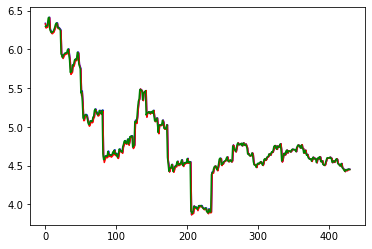

[[1.74523058e-03 1.19958072e-03]
 [1.85098159e-04 9.43236312e-04]
 [4.75297710e-05 1.21476575e-05]
 [9.38441449e-04 2.20445987e-03]
 [5.51736015e-03 7.23990081e-03]
 [2.37975570e-05 3.62695661e-04]
 [2.11561386e-02 1.88170920e-02]
 [5.06540532e-04 6.65375276e-05]
 [3.45185725e-04 1.44261578e-05]
 [5.92551583e-06 1.17434713e-04]
 [1.05602869e-04 5.83091716e-04]
 [2.84056786e-05 3.29988237e-04]
 [5.03758143e-04 1.24603125e-03]
 [6.39822160e-04 1.42137882e-03]
 [1.31009982e-03 2.29533075e-03]
 [3.13396994e-04 8.42211030e-04]
 [7.08174344e-06 1.74610104e-04]
 [3.72027483e-03 2.56046769e-03]
 [3.11433118e-05 2.68970285e-04]
 [7.26074813e-05 2.17742045e-05]
 [1.25902852e-04 1.74978843e-06]
 [1.85336387e-04 1.89399985e-06]
 [9.45502822e-02 8.83234775e-02]
 [2.82671288e-05 3.25241745e-04]
 [1.33296677e-03 2.14125473e-04]
 [8.69318801e-04 1.49921666e-03]
 [1.11774517e-04 9.25159686e-04]
 [2.42918392e-04 5.82788314e-04]
 [1.18238312e-07 3.17753932e-04]
 [4.28988779e-05 2.41955463e-04]
 [4.676809

In [239]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import numpy as np
tscv = TimeBasedCV(train_period=730, test_period=1, freq='days')
XData = data_for_modeling[['Credit Spread']]

#print(XData)


#Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(XData)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

#There is need to diferenciate

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':400})

# Import data
#df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/wwwusage.csv', names=['value'], header=0)

# Original Series
#fig, axes = plt.subplots(3, 2, sharex=True)
#axes[0, 0].plot(XData); axes[0, 0].set_title('Original Series')
#plot_acf(XData, ax=axes[0, 1], lags=1962)

plot_acf(XData)
plt.show()

# 1st Differencing
#axes[1, 0].plot(XData.diff()); axes[1, 0].set_title('1st Order Differencing')
#plot_acf(XData.diff().dropna(), ax=axes[1, 1])
plt.plot(XData)
plt.plot(XData.diff().dropna())

plot_acf(XData.diff().dropna())
plt.show()

# 2nd Differencing
#axes[2, 0].plot(XData.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
#plot_acf(XData.diff().diff().dropna(), ax=axes[2, 1])

plot_acf(XData.diff().diff().dropna())
plt.show()

from statsmodels.tsa.stattools import adfuller
#from numpy import log
result = adfuller(XData.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
#Set to 1, d

print('PACF')
plot_pacf(XData.diff().dropna())
plt.show()
#Set to 1, p

print('ACF')
plot_acf(XData.diff().dropna())
plt.show()
#Set to 1, q


modelPerformances = []
modelForecast = []
modelForecast2 = []
modelObserved = []
modelObservedMoves = []
modelForecastMoves = []
modelForecast2Moves = []


countSplit = 0

for train_index, test_index in tscv.split(data_for_modeling, date_column='Fecha'):
    #print(train_index)
    #print(test_index)
    data_train   = XData.loc[train_index]
    data_test    = XData.loc[test_index]
    
    X = data_train.values

    #plt.plot(X)
    #plt.show()
    #plt.figure()
    
    
    # Adjust an ARIMA models
      #days_in_year = 365
    # Remove the stationary component
      #differenced = difference(X, days_in_year)
    
    
    ###########################
    # fit model        
    model1 = ARIMA(X, order=(1,1,1))
    model_fit = model1.fit()
    # summary of fit model
    #print(model_fit.summary())
    # compute the forecasting
    forecast = model_fit.forecast(steps=len(data_test))
    #print(forecast)
    #print(data_test)
     
        
    df = pd.DataFrame(data_test, columns= ['Credit Spread'])
    creditSpread_list = df.values.tolist()
    print (creditSpread_list)
    
    for k in range(len(data_test)):
        modelObserved.append(creditSpread_list [k])
  
    for j in range(len(data_test)):
        modelForecast.append(forecast[j])
    
    #predictedAmount = 
    #if modelForecast[j]-
    
    
    #residuals = pd.DataFrame(model_fit.resid)
    #fig, ax = plt.subplots(1,2)
    #residuals.plot(title="Residuals", ax=ax[0])
    #residuals.plot(kind='kde', title='Density', ax=ax[1])
    #plt.show()
    
        #forecast = inverse_difference(X, forecast, days_in_year)
    #print(forecast)
    mse1 = (((forecast - data_test.to_numpy()) ** 2)).mean()
    #print(mse1)
    ###########################
    
    # fit model        
    model2 = ARIMA(X, order=(2,2,2))
    model_fit = model2.fit()
    # compute the forecasting
    forecast = model_fit.forecast(steps=len(data_test))
        #forecast = inverse_difference(X, forecast, days_in_year)
    mse2 = (((forecast - data_test.to_numpy()) ** 2)).mean()
    ############################

    for h in range(len(data_test)):
        modelForecast2.append(forecast[h])
        
    modelPerformances.append([mse1,mse2])
    countSplit = countSplit + 1

    print('Split-->{}'.format(round(countSplit, 2)))
    print('The Mean Squared Error of forecasts in Model 1  is {}'.format(round(mse1, 8)))
    print('The Mean Squared Error of forecasts in Model 2  is {}'.format(round(mse2, 8)))
    
    if countSplit == 430:
        break   

#print(modelForecast)
#print(modelForecast2)
print(modelObserved[0][0])

for t in range(len(modelObserved)):
    if t!= 0:
        modelObservedMoves.append(modelObserved [t][0]-modelObserved [t-1][0])
        
for t in range(len(modelForecast)):
    if t!= 0:
        modelForecastMoves.append(modelForecast [t]-modelForecast [t-1])

for t in range(len(modelForecast2)):
    if t!= 0:
        modelForecast2Moves.append(modelForecast2 [t]-modelForecast2 [t-1])
        
#print('Hola')
#print(modelObserved)
print(modelObservedMoves)
#print(modelForecast)
print(modelForecastMoves)
print(modelForecast2Moves)

resultDelta = []

observedPositive=0
observedNegative=0
observedTotal=len(modelObservedMoves)

predictedPositive=0
predictedNegative=0
predictedFalsePositive = 0
predictedPositiveFalse = 0


predictedPositive2=0
predictedNegative2=0
predictedFalsePositive2 = 0
predictedPositiveFalse2 = 0


for y in range(len(modelObservedMoves)):
    if modelObservedMoves[y]>=0 and modelForecastMoves[y]>=0:
        predictedPositive=predictedPositive+1
    if modelObservedMoves[y]>=0 and modelForecastMoves[y]<0:
        predictedPositiveFalse=predictedPositiveFalse+1
    if modelObservedMoves[y]<0 and modelForecastMoves[y]>=0:
        predictedFalsePositive=predictedFalsePositive+1
    if modelObservedMoves[y]<0 and modelForecastMoves[y]<0:
        predictedNegative=predictedNegative+1


for y in range(len(modelObservedMoves)):
    if modelObservedMoves[y]>=0 and modelForecast2Moves[y]>=0:
        predictedPositive2=predictedPositive2+1
    if modelObservedMoves[y]>=0 and modelForecast2Moves[y]<0:
        predictedPositiveFalse2=predictedPositiveFalse2+1
    if modelObservedMoves[y]<0 and modelForecast2Moves[y]>=0:
        predictedFalsePositive2=predictedFalsePositive2+1
    if modelObservedMoves[y]<0 and modelForecast2Moves[y]<0:
        predictedNegative2=predictedNegative2+1
    
        

#print(predictedPositive)
#print(predictedPositiveFalse)
#print(predictedFalsePositive)
#print(predictedNegative)

#confusion matrix
#Model 1

PP1 = predictedPositive/(predictedPositive+predictedPositiveFalse)
PN1 = predictedPositiveFalse/(predictedPositive+predictedPositiveFalse)
NP1 = predictedFalsePositive/(predictedFalsePositive+predictedNegative)
NN1 = predictedNegative/(predictedFalsePositive+predictedNegative)

print('Confusion Matrix-Model1')
print('                      Predicted')
print('              Positive      Negative')
print('Positive-real   ', round (PP1,2), '      ',round(PN1,2) )
print('Negative-real   ', round(NP1,2), '      ',round(NN1,2) )


#confusion matrix
#Model 2
PP2= predictedPositive2/(predictedPositive2+predictedPositiveFalse2)
PN2= predictedPositiveFalse2/(predictedPositive2+predictedPositiveFalse2)
NP2=predictedFalsePositive2/(predictedFalsePositive2+predictedNegative2)
NN2=predictedNegative2/(predictedFalsePositive2+predictedNegative2)

print('')
print('')
print('----')
print('Confusion Matrix-Model2')
print('                      Predicted')
print('              Positive      Negative')
print('Positive-real   ', round(PP2,2) , '      ', round(PN2,2) )
print('Negative-real   ', round(NP2,2), '      ',round(NN2,2) )


plt.plot(modelForecast, color="blue")
plt.plot(modelForecast2, color="red")
plt.plot(modelObserved, color="green")
plt.show()

mp = np.array(modelPerformances)
print(mp)
print('----')
print(mp.mean(0))
print(mp.std(0))
